In [7]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [8]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [9]:
# code here
df = pd.read_csv("data/bank-full.csv", sep=";")

Describe the dataset informations

In [3]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
numeric = ["age", "balance", "day", "duration", "campaign","pdays", "previous"]

Use histogramms to display the features' distribution

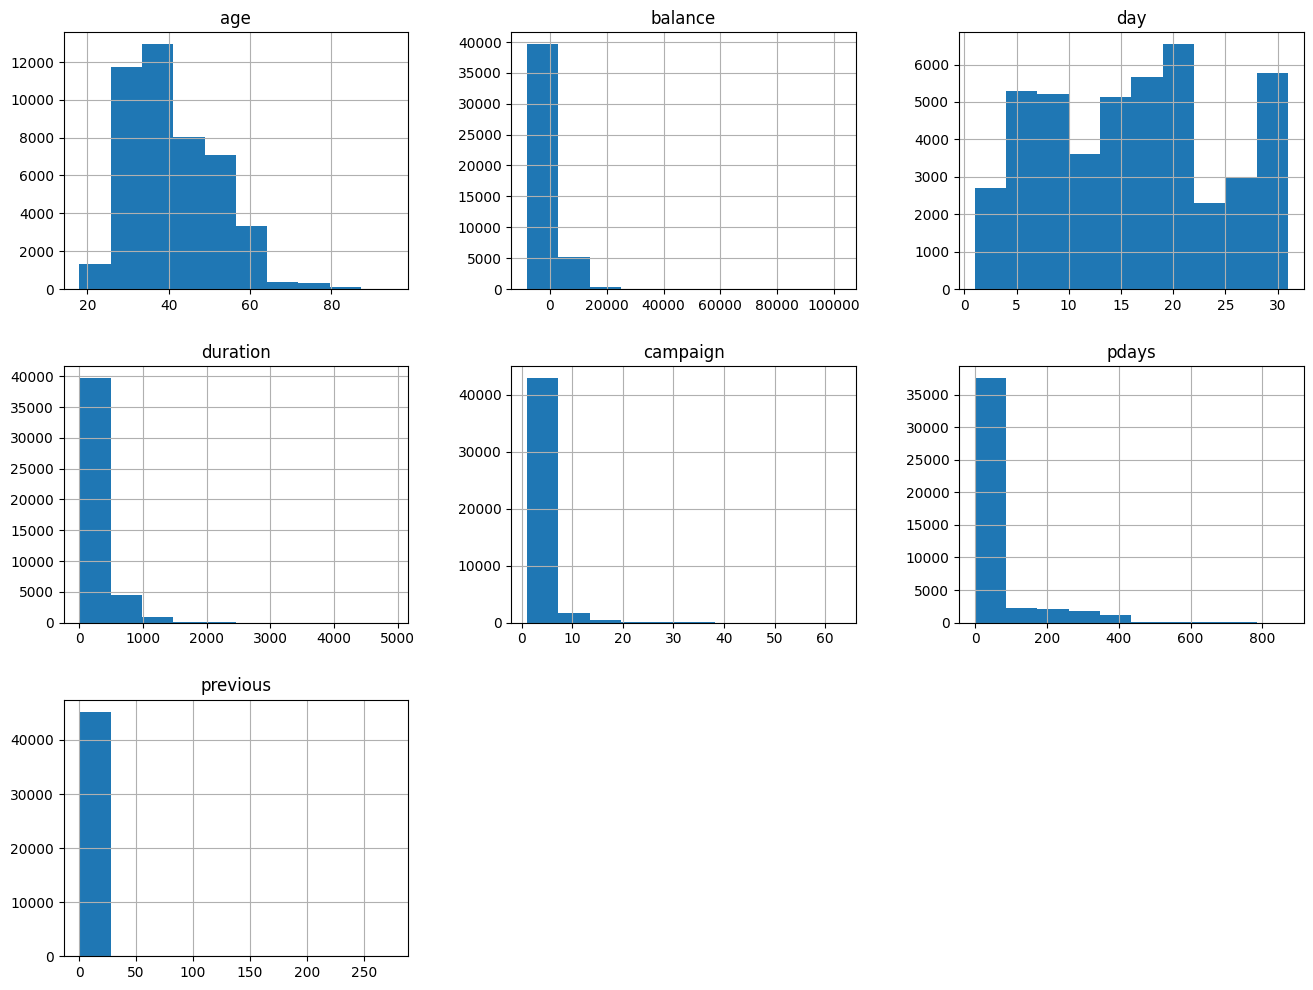

In [12]:
rcParams['figure.figsize'] = 16,12
plots = df[numeric].hist()

Use heatmap to display the numerical features' correlation

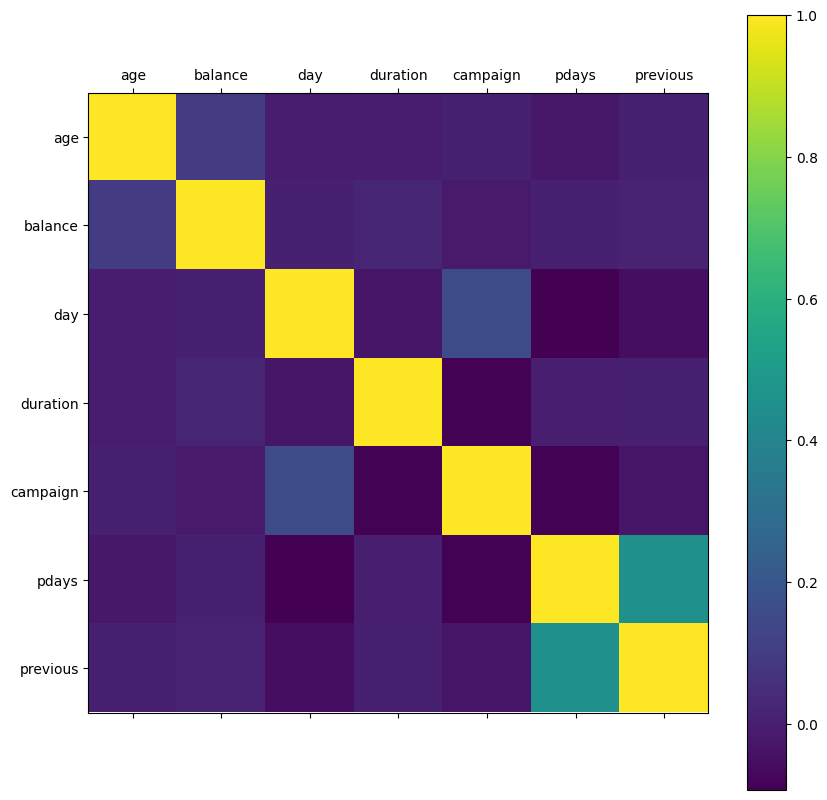

In [13]:
import numpy as np
rcParams['figure.figsize'] = 10, 10
plt.matshow(df[numeric].corr())
plt.yticks(np.arange(df[numeric].shape[1]), df[numeric].columns)
plt.xticks(np.arange(df[numeric].shape[1]), df[numeric].columns)
plt.colorbar()

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?



In [14]:
df[df["duration"].duplicated()==1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39,37,admin.,single,secondary,no,0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
40,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,160,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
47,44,technician,married,secondary,no,0,yes,no,unknown,5,may,225,2,-1,0,unknown,no
48,55,technician,divorced,secondary,no,0,no,no,unknown,5,may,160,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> Le soir, Le week end ? 

In [15]:
# remove duration column

df = df.drop(columns="duration", axis=1)

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [16]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [17]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime
dayoftheyear = df['day'].astype(str) + "-" + df['month'].astype(str)

df['dayoftheyear'] = dayoftheyear
df['dayoftheyear'] = df['dayoftheyear'].str.title()


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

In [18]:
df = df.drop(columns = ["day", "month"])

In [19]:
categorical_features = ["job", "marital" , "education", "default", "housing", "loan", "contact", "poutcome",'dayoftheyear','y'] # to be completed
numerical_features = ["age", "balance", "campaign","pdays", "previous"] # to be completed

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[categorical_features])


In [21]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_features))

In [22]:
df2 = pd.concat([df[numerical_features], encoded_df], axis=1)

In [23]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df2.drop(columns='y_yes', axis=1)
y = df2['y_yes']



# train_test split
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [20]:
# import and create the appropriate transformers 



At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train_scaled, y_train)

y_pred = dummy_clf.predict(X_test_scaled)


# Code here to get dummy classifier F1score and accuracy
f1 = f1_score(y_test, y_pred)
print("f1 :", f1)
accuracy = accuracy_score(y_test, y_pred)
print("accuraccy:" , accuracy)


f1 : 0.0
accuraccy: 0.879976408139192


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier

t_clf = DecisionTreeClassifier(max_depth= 3 )

t_clf.fit(X_train_scaled, y_train)



DecisionTreeClassifier(max_depth=3)

In [24]:
y_pred = t_clf.predict(X_test_scaled)

[Text(0.5, 0.75, 'y_no <= -1.191\ngini = 0.207\nsamples = 31647\nvalue = [27940, 3707]\nclass = No'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3707\nvalue = [0, 3707]\nclass = Yes'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 27940\nvalue = [27940, 0]\nclass = No'),
 Text(0.625, 0.5, '  False')]

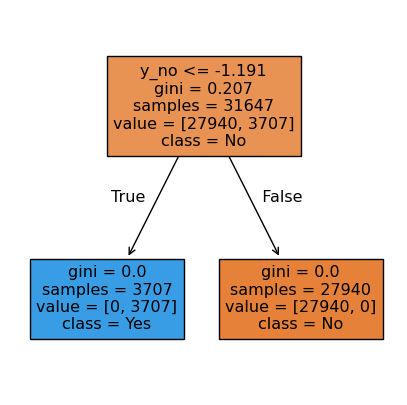

In [25]:
# Decision tree model creation and tree visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(t_clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [26]:
# create a new train and test dataset with a different seed

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

[Text(0.5, 0.75, 'y_no <= -1.185\ngini = 0.208\nsamples = 31647\nvalue = [27916, 3731]\nclass = No'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3731\nvalue = [0, 3731]\nclass = Yes'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 27916\nvalue = [27916, 0]\nclass = No'),
 Text(0.625, 0.5, '  False')]

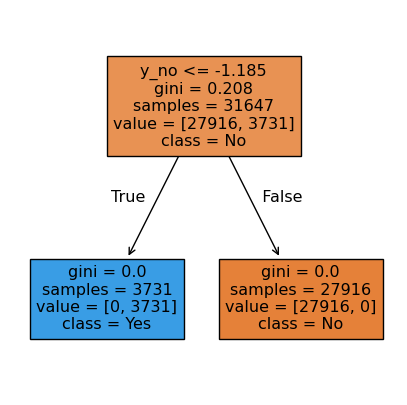

In [27]:
# Second tree creation

from sklearn.tree import DecisionTreeClassifier

t_clf = DecisionTreeClassifier(max_depth= 3 )

t_clf.fit(X_train_scaled, y_train)

y_pred = t_clf.predict(X_test_scaled)

plt.figure(figsize=(5,5))
plot_tree(t_clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])

What can you tell about the two trees?

En changeant le ramdom state, on peu voir un changement dans l'équilibrage des prédictions en faveur ou contre la target

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [28]:
# Test if the target is balanced

In [24]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_val_score, cross_validate
t_clf = DecisionTreeClassifier(max_depth=3)
score = cross_val_score(X=X_train_scaled, y=y_train, cv=12, estimator=t_clf, scoring='f1')



metrics = ['f1', 'accuracy', 'precision', 'recall']
validate = cross_validate(estimator=t_clf, X=X_train_scaled, y=y_train, cv=12, scoring=metrics)

validate

NameError: name 'DecisionTreeClassifier' is not defined

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

In [30]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [31]:
# Grid search
from sklearn.model_selection import GridSearchCV
depth_range = range(2, 10)
param_grid = {
    'max_depth': depth_range
}

clf = DecisionTreeClassifier()

grid_shearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_shearch.fit(X_train_scaled, y_train)

print(f'meilleurs paramettre trouvées: {grid_shearch.best_params_}')
print(f'meilleur score accuracy : {grid_shearch.best_score_ * 100} %')


meilleurs paramettre trouvées: {'max_depth': 2}
meilleur score accuracy : 100.0 %


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = df2.drop(columns='y_yes', axis=1)
y = df2['y_yes']

# train_test split
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

clf = DecisionTreeClassifier(max_depth= 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
scoredecisiontree = classification_report(y_test, y_pred)

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [33]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [25]:
# gridsearch for the Random Forest classifier
# Algorythm de bagging
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
depth_range = range(2, 10)
estimator_range = [10, 20, 30, 40, 50, 60 , 70 , 80, 90, 100]
param_grid = {
    'max_depth': depth_range,
    'n_estimators': estimator_range}

clf = RandomForestClassifier()

grid_shearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_shearch.fit(X_train_scaled, y_train)

print(f'meilleurs paramettre trouvées: {grid_shearch.best_params_}')
print(f'meilleur score accuracy : {grid_shearch.best_score_ * 100} %')



KeyboardInterrupt: 

How much estimators should we use for obtaining an optimal result? (in terms of time and performance) 'max_depth': 9, 'n_estimators': 70

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [35]:
from sklearn.metrics import recall_score
# Test metrics
X = df2.drop(columns='y_yes', axis=1)
y = df2['y_yes']

# train_test split
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

clf = RandomForestClassifier(max_depth= 9, n_estimators=70,  oob_score = True,
                           bootstrap = True,
                           random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}') 
print(f'Out of Bag Score: {clf.oob_score_}')

F1 Score: 0.49607390300230947
Recall: 0.3298525798525799
Accuracy: 0.9195664995576526
Out of Bag Score: 0.9320630707492021


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [36]:
# display features' importance => use the RandomForest Object 
from sklearn.metrics import recall_score
# Test metrics
X = df2.drop(columns='y_yes', axis=1)
y = df2['y_yes']

# train_test split
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, test_size=0.3)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

clf = RandomForestClassifier(max_depth= 4, n_estimators=50,  oob_score = True,
                           bootstrap = True,
                           random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}') 
print(f'Out of Bag Score: {clf.oob_score_}')


F1 Score: 0.0230722525804493
Recall: 0.01167076167076167
Accuracy: 0.8813771748746683
Out of Bag Score: 0.8894365974657945


<Axes: >

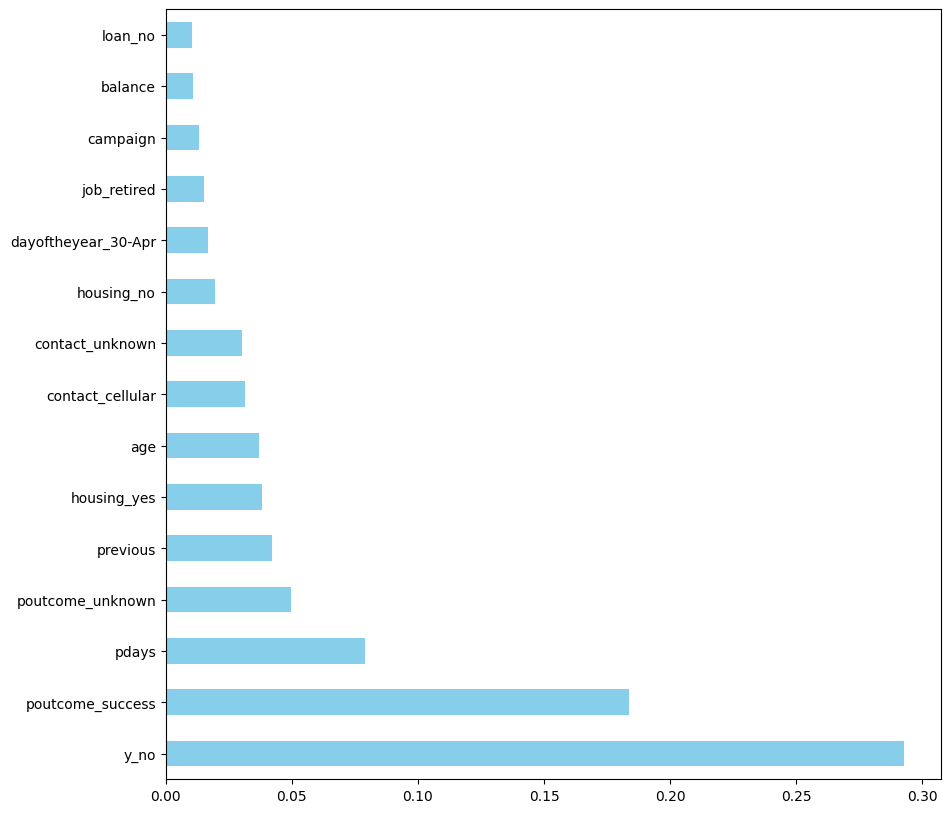

In [37]:
importances = clf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

for i in range(len(feat_importances) - 1, -1, -1):
    if feat_importances.iloc[i] < 0.01:
        feat_importances = feat_importances.drop(feat_importances.index[i])
        
feat_importances.plot(kind='barh', color='skyblue')

What is the most important feature?

La principale feature est Y_no correspondant aux personnes qui n'ont pas souscrit au contrat

résutat positif de la précédente campagne Marketing

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [26]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features 
from sklearn.feature_selection import RFE
clf  = RandomForestClassifier(n_estimators=70, max_depth=9, random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=5,step=1)
rfe.fit(X_train_scaled, y_train)


RFE(estimator=RandomForestClassifier(max_depth=9, n_estimators=70,
                                     random_state=42),
    n_features_to_select=5)

In [61]:
selected_features = X_train.columns[rfe.support_]
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report
print("Variables sélectionnées :", list(selected_features))
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)


clfnew = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
clfnew.fit(X_train_selected, y_train)


y_pred = clfnew.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')
outof_bag_score = clfnew.oob_score_
print(f'out of bag : {outof_bag_score}')
recall = recall_score(y_test, y_pred)
print(f'recall: {recall}')
scorerf = classification_report(y_test, y_pred)

Variables sélectionnées : ['age', 'pdays', 'housing_no', 'poutcome_success', 'y_no']


c:\Users\Corentin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(
c:\Users\Corentin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


accuracy: 1.0
out of bag : 1.0
recall: 1.0


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before 

# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [31]:
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, test_size=0.3)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_round = 10
bst = xgb.train(params, dtrain, num_round)
y_pred = bst.predict(dtest)


y_pred_binary = (y_pred >= 0.5).astype(int)

f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'f1 : {f1} accuracy: {accuracy}')



f1 : 1.0 accuracy: 1.0


Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [33]:
# model building and evaluation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.75, 1],
    'colsample_bytree': [0.75, 1],
    'n_estimators': [10,20,30,40,50],
    'min_child_weight': [1, 5]
}
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # métrique d’évaluation
    cv=3,               # nombre de folds en validation croisée
    n_jobs=-1,          # utiliser tous les cœurs CPU disponibles
    verbose=1
)
grid_search.fit(X_train, y_train)
# print(f'meilleurs paramettre trouvées: {grid_shearch.best_params_}')
# print(f'meilleur score accuracy : {grid_shearch.best_score_ * 100} %')

Fitting 3 folds for each of 160 candidates, totalling 480 fits


c:\Users\Corentin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'min_child_weight': [1, 5],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'subsample': [0.75, 1]},
             scoring='accuracy', verbose=1)

In [34]:
print(f'Meilleurs paramètres trouvés: {grid_search.best_params_}')

Meilleurs paramètres trouvés: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.75}


In [ ]:
# gridsearch 

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
from sklearn.metrics import classification_report
xgb_model= xgb.XGBClassifier(random_state=42, eval_metric='logloss', colsample_bytree=0.75, learning_rate=0.1,max_depth=3,min_child_weight=1, n_estimators=10, subsample=0.75)

xgb_model.fit(X_train, y_train)

ypred_proba = xgb_model.predict_proba(X_test)[:,1]
y_pred_binary = (ypred_proba >= 0.5).astype(int)

# y_pred_binary = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'accuracy : {accuracy}')
classscore = classification_report(y_test, y_pred_binary)
print(classscore)


accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11936
         1.0       1.00      1.00      1.00      1628

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



In [ ]:
# performance curves



## Let's Conclude

Report your test set metrics for the three methods here

In [59]:
# Decision Tree on test set
scoredecisiontree

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     11936\n         1.0       1.00      1.00      1.00      1628\n\n    accuracy                           1.00     13564\n   macro avg       1.00      1.00      1.00     13564\nweighted avg       1.00      1.00      1.00     13564\n'

In [62]:
# Random forest on test set
scorerf

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     11936\n         1.0       1.00      1.00      1.00      1628\n\n    accuracy                           1.00     13564\n   macro avg       1.00      1.00      1.00     13564\nweighted avg       1.00      1.00      1.00     13564\n'

In [63]:
# XGBoost on test set
classscore

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     11936\n         1.0       1.00      1.00      1.00      1628\n\n    accuracy                           1.00     13564\n   macro avg       1.00      1.00      1.00     13564\nweighted avg       1.00      1.00      1.00     13564\n'

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

***Bagging***

Lors de l'ensachage, nous échantillonnons d'abord des sous-ensembles de données de taille égale à partir d'un ensemble de données avec bootstrapping, c'est-à-dire que nous échantillonnons avec remplacement. Ensuite, nous utilisons ces sous-ensembles pour entraîner plusieurs modèles faibles indépendamment. Un modèle faible est un modèle avec une faible précision de prédiction. En revanche, les modèles solides sont très précis. Pour obtenir un modèle fort, nous agrégeons les prédictions de tous les modèles faibles

***Boosting***
repondération de la sélection en fonction de la performance du modèle. 

Le boosting améliore généralement la précision d’un modèle d’apprentissage automatique en améliorant les performances des apprenants faibles. Nous utilisons généralement XGBoost, Boost de chat, et AdaBoost.

Ces algorithmes appliquent différentes techniques de boosting et sont surtout connus pour atteindre d’excellentes performances.

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here